In [8]:
from plotting.style_setup import setup_plot_style
from metrics_extractor import MetricsExtractor, PrometheusSource, metrics_io
from datetime import datetime, timedelta, timezone
from plotting.plot_templates import *
setup_plot_style()

# Available Metrics

In [9]:
type_exp = "mod"

selected_metrics = [
    "mc_players_online_local{world='world'}", #0
    "mc_tps", #1
    "quantile(0.5, mc_tps)", #2
    "quantile(0.95, mc_tps)", #3
    "sum(mc_players_online_local{world='world'})", #4
    "count(count by(server_name) (mc_tps))", #5
    "mc_mspt_seconds_10_mean", #6
    "rate(container_network_receive_bytes_total{pod=~'multipaper-master-.*'}[1m])", #7
    "rate(container_network_transmit_bytes_total{pod=~'multipaper-master-.*'}[1m])", #8
    "rate(container_network_receive_bytes_total{pod=~'multipaper-server-.*'}[1m])", #9
    "rate(container_network_transmit_bytes_total{pod=~'multipaper-server-.*'}[1m])", #10
    "container_memory_usage_bytes{container='multipaper-master-velocity'}", #11
    "container_memory_usage_bytes{container='multipaper-server'}", #12
    "rate(container_cpu_usage_seconds_total{container='multipaper-master-velocity'}[1m])", #13
    "rate(container_cpu_usage_seconds_total{container='multipaper-server'}[1m])", #14
    "sum by(owner) (mc_chunk_ownership)", #15
    "minecraft_world_loaded_chunks{world='world'}", #16
    "mc_player_location", #17
    "sum by(chunk_owner) (mc_player_location)", #18
    "server_latency", #19
    "avg(server_latency)", #20
    "max(server_latency)", #21
    "min(server_latency)", #22 
    "quantile(0.5, server_latency)", #23
    "quantile(0.99, server_latency)", #24
    "avg(mc_tps)", #25
    "avg(mc_mspt_seconds_10_mean)", #26
    "quantile(0.95, mc_mspt_seconds_10_mean)", #27
    "quantile(0.5, mc_mspt_seconds_10_mean)", #28
    # "sum(mc_tps)", #29
    # "quantile(0.99, mc_tps)", #30
    # "minecraft_tick_duration_seconds_bucket", #31
    # "sum(rate(minecraft_tick_duration_seconds_bucket[2s])) by(le)", #32
    # "mc_chunk_ownership", #33
    "velocity_server_chunks", #29
    "velocity_server_mspt", #30
    "velocity_server_players", #31
    "velocity_server_quality", #32
]

### Change Time Zone (to UTC + 02:00)

Only if needed

In [4]:
def change_timezone(input_time):
    """
    Change the timezone of the timestamp from UTC to UTC +020:00 (Europe/Berlin).
    """
    utc = timezone.utc
    utc_plus_2 = timezone(timedelta(hours=2))

    from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)
    to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)

    from_time_local = from_time.astimezone(utc_plus_2)
    to_time_local = to_time.astimezone(utc_plus_2)

    return from_time_local, to_time_local

# Extract Metrics

In [12]:
experiment = "test006_5servers_240players_walk_newq"

input_time = {"from":"2025-07-10 19:05:00","to":"2025-07-10 19:17:30"}

# Uncomment the following lines to use the original time parsing UTC +00
from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S")
to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S")

# Use the change_timezone function to convert the time to UTC +02:00
# from_time, to_time = change_timezone(input_time)

# UNCOMMENT THE FOLLOWING LINES TO EXTRACT METRICS FROM PROMETHEUS
prometheus = PrometheusSource(url="http://localhost:56828/")
extractor = MetricsExtractor()

metrics_io.save_metrics(selected_metrics, from_time, to_time, prometheus, extractor, experiment, type_exp)

2025-07-10 19:19:09,039 - metrics_extractor - INFO - Using range vector query: mc_players_online_local{world='world'}[750s] @ 2025-07-10 19:17:30
2025-07-10 19:19:09,125 - metrics_extractor - INFO - Using range vector query: mc_tps[750s] @ 2025-07-10 19:17:30
2025-07-10 19:19:09,223 - metrics_extractor - INFO - Handling function query: quantile(0.5, mc_tps)
2025-07-10 19:19:09,551 - metrics_extractor - INFO - Handling function query: quantile(0.95, mc_tps)
2025-07-10 19:19:09,603 - metrics_extractor - INFO - Handling function query: sum(mc_players_online_local{world='world'})
2025-07-10 19:19:09,664 - metrics_extractor - INFO - Handling function query: count(count by(server_name) (mc_tps))
2025-07-10 19:19:09,719 - metrics_extractor - INFO - Using range vector query: mc_mspt_seconds_10_mean[750s] @ 2025-07-10 19:17:30
2025-07-10 19:19:09,819 - metrics_extractor - INFO - Handling function query: rate(container_network_receive_bytes_total{pod=~'multipaper-master-.*'}[1m])
2025-07-10 19:1

In [14]:
import os
print(os.environ["PATH"])
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
print(os.environ["PATH"])

/usr/local/bin:/Users/joanba/Library/Python/3.12/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin
/usr/local/bin:/Users/joanba/Library/Python/3.12/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin:/Library/TeX/texbin


# Plots

## 60 players simple-walk, 2 servers, 10 min

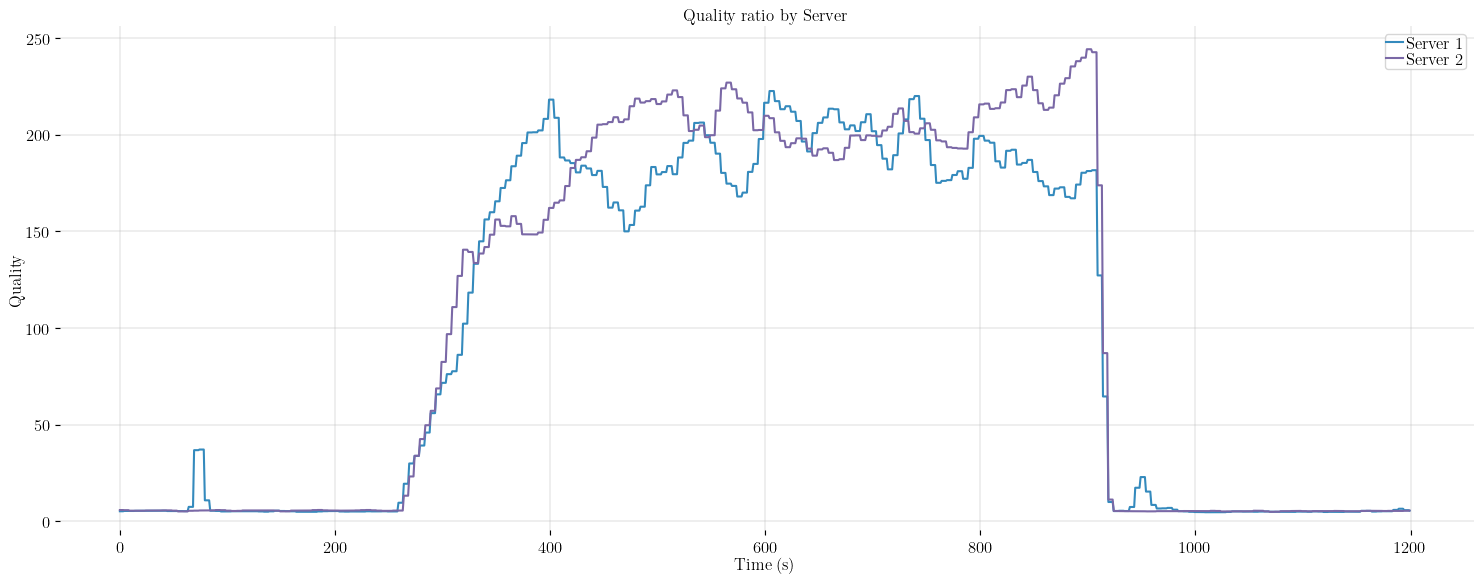

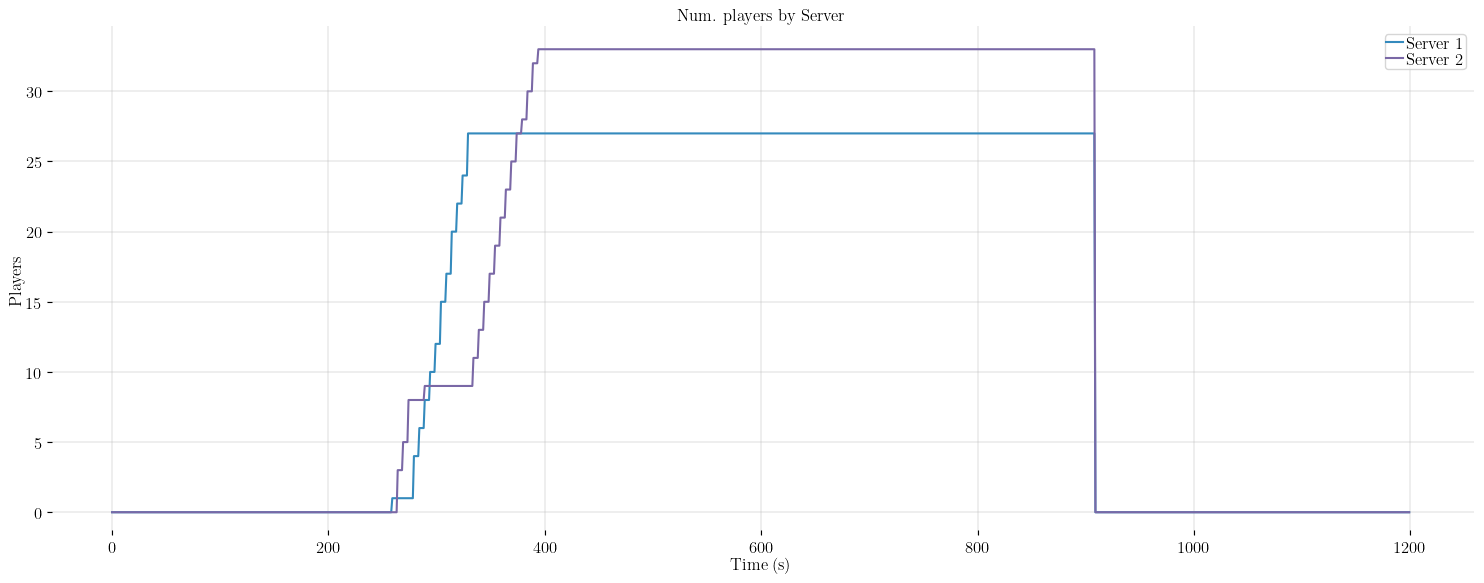

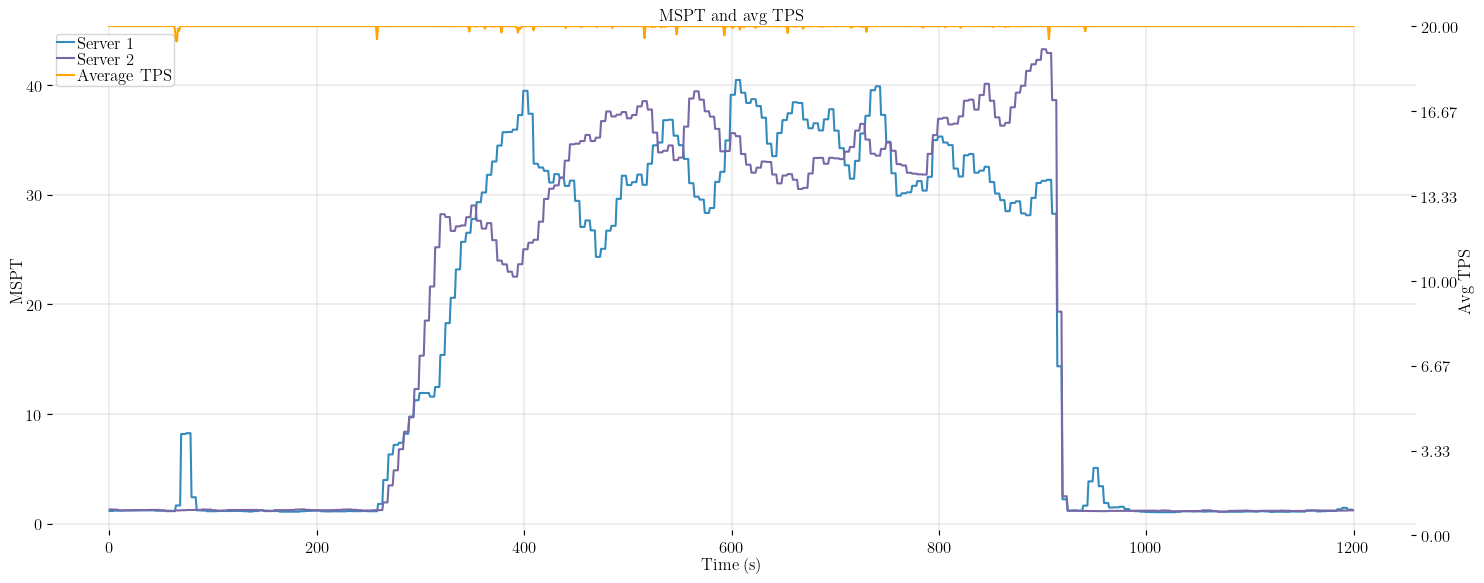

In [6]:
experiment = "test002_2servers_60players_walk"
#tps_players_plot(experiment, selected_metrics, type_exp)
#mspt_plot(experiment, selected_metrics, type_exp)
#mspt_stats_plot(experiment, selected_metrics, type_exp)
#players_servers_plot(experiment, selected_metrics, type_exp)
#tps_servers_plot(experiment, selected_metrics, type_exp)
#player_tps_server_plot(experiment, selected_metrics, type_exp)
#chunk_ownership_plot(experiment, selected_metrics, type_exp)
#players_chunks_owner_plot(experiment, selected_metrics, type_exp)
quality_master_plot(experiment, selected_metrics, type_exp)
players_master_plot(experiment, selected_metrics, type_exp)
#mspt_master_plot(experiment, selected_metrics, type_exp)
mspt_tps_master_plot(experiment, selected_metrics, type_exp)


# 240 players simple-walk, 2 servers, about 20 minutes

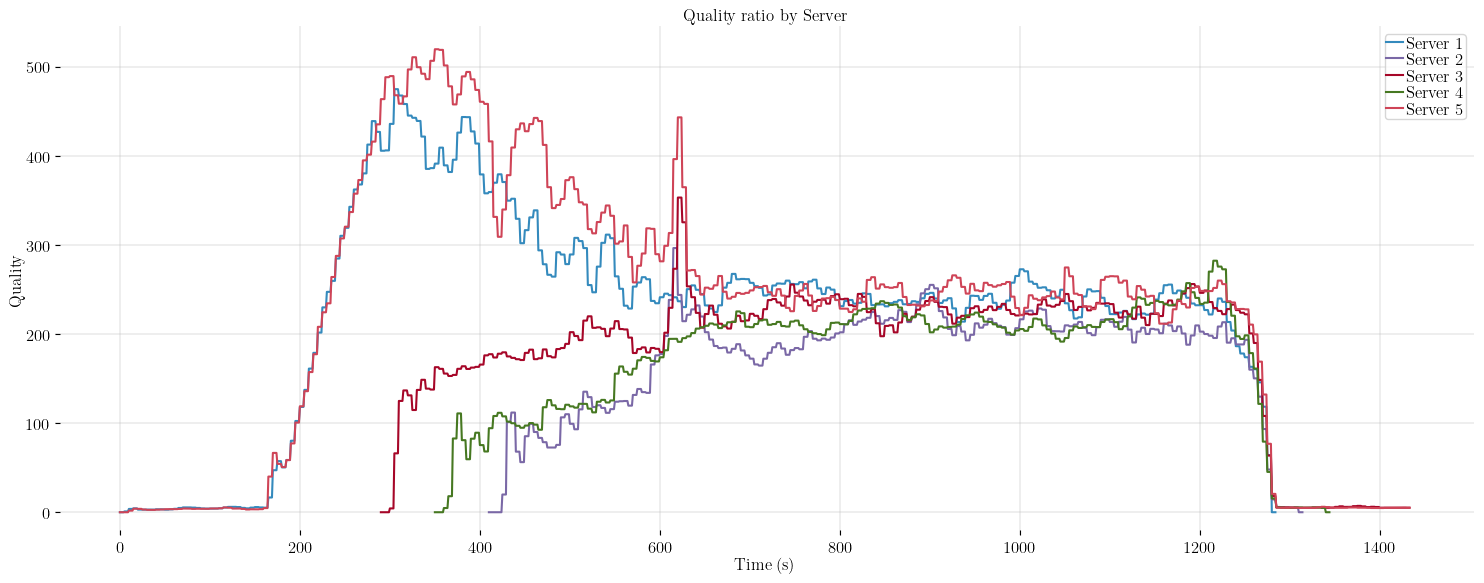

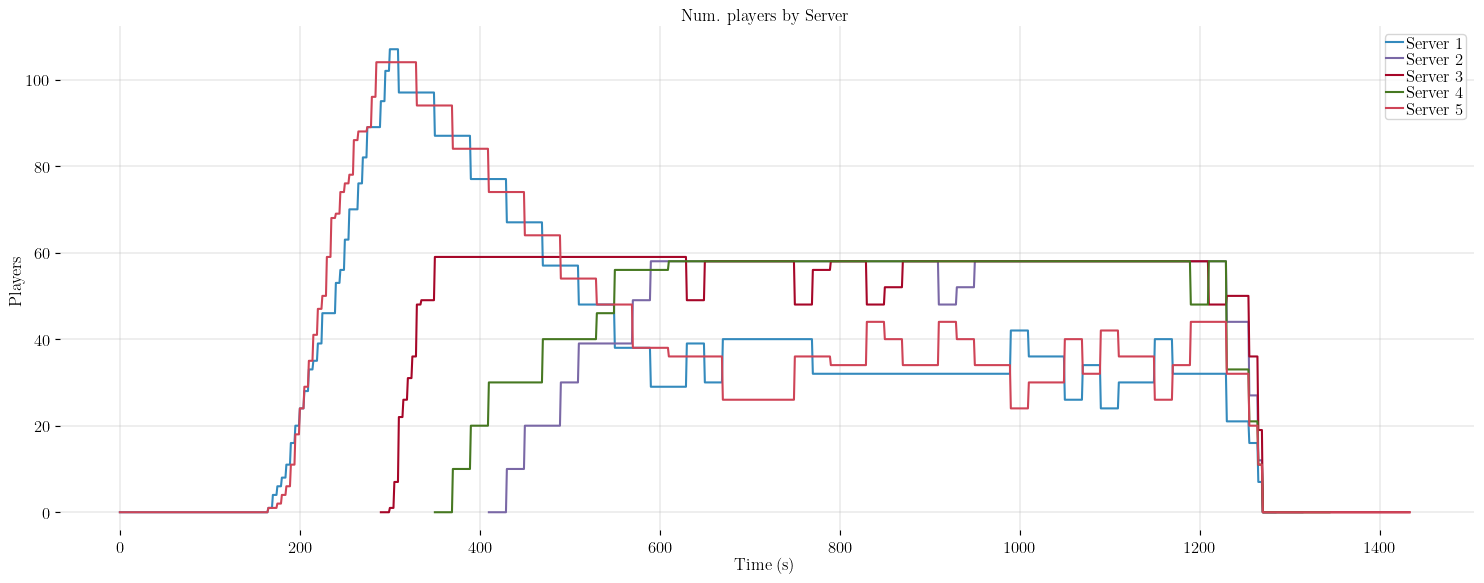

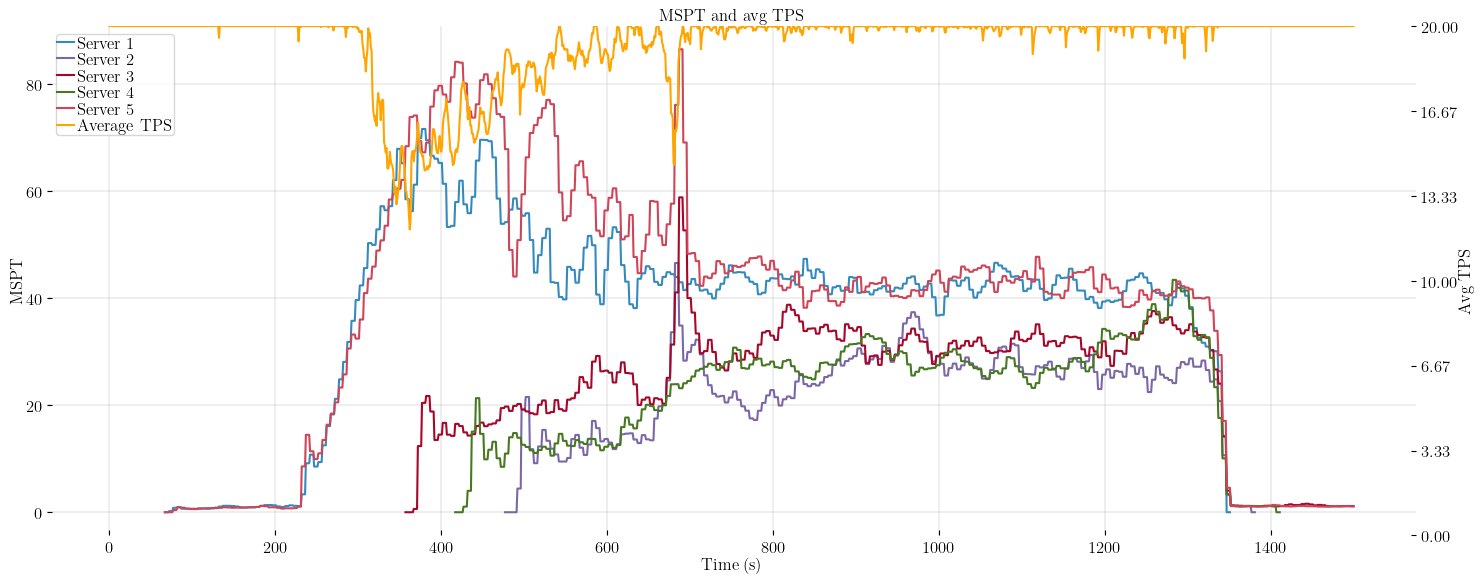

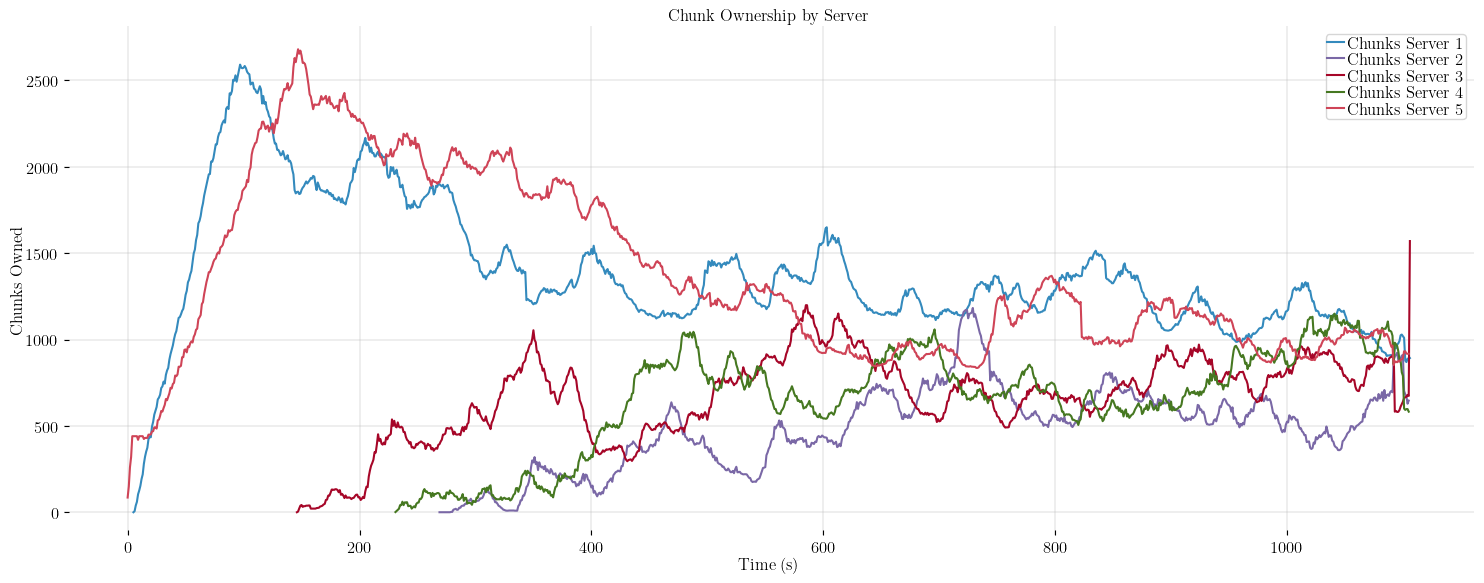

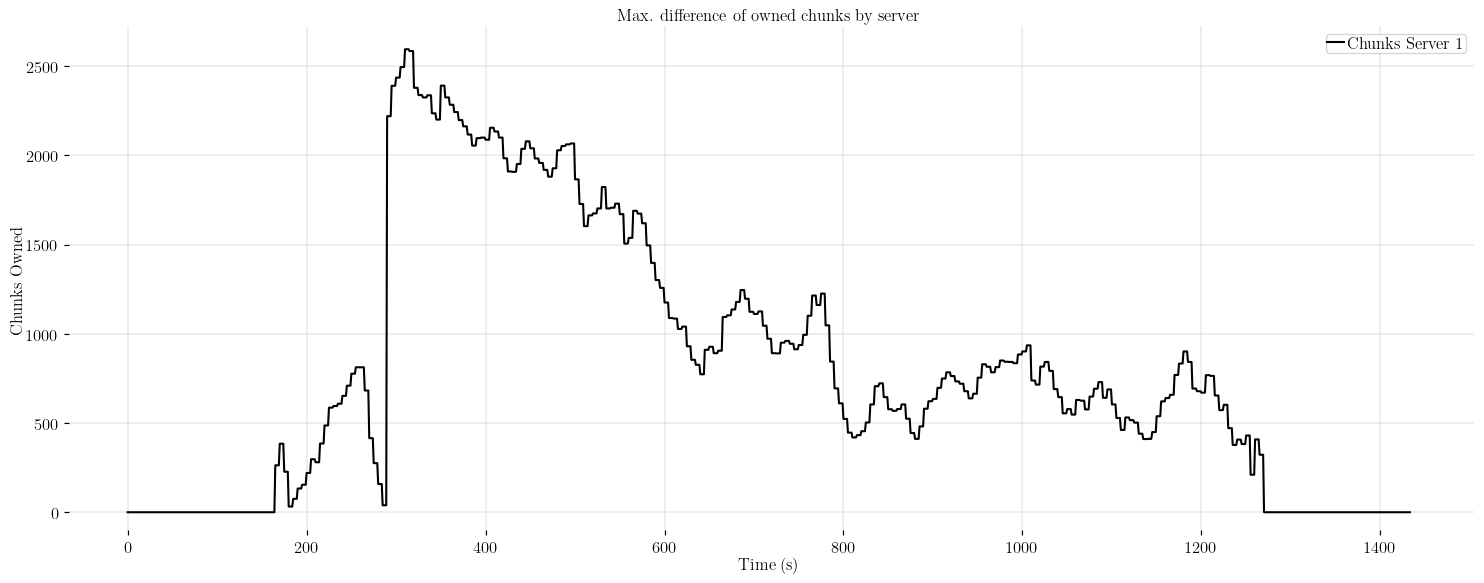

In [4]:
experiment = "test003_2servers_240players_walk"
# tps_players_plot(experiment, selected_metrics, type_exp)
# mspt_plot(experiment, selected_metrics, type_exp)
# mspt_stats_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# player_tps_server_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)
quality_master_plot(experiment, selected_metrics, type_exp)
players_master_plot(experiment, selected_metrics, type_exp)
#mspt_master_plot(experiment, selected_metrics, type_exp)
mspt_tps_master_plot(experiment, selected_metrics, type_exp)
#owned_chunks_master_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
max_diff_chunks_master_plot(experiment, selected_metrics, type_exp)


# 240 players simple-walk, 5 servers

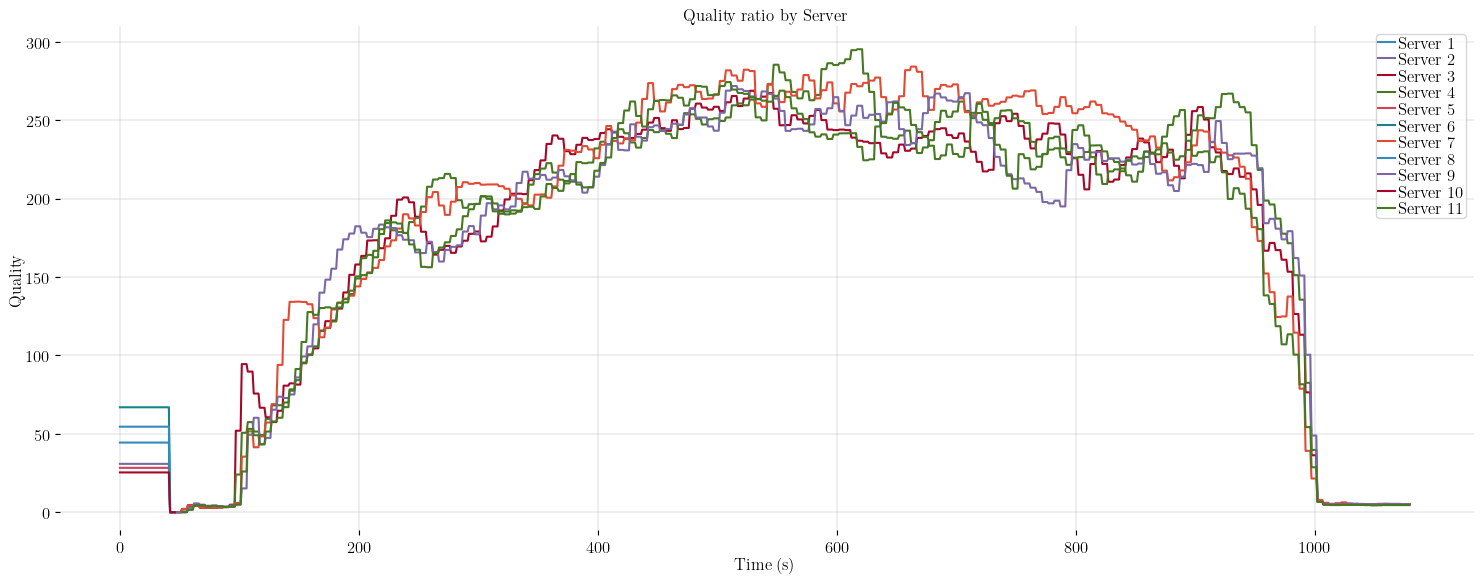

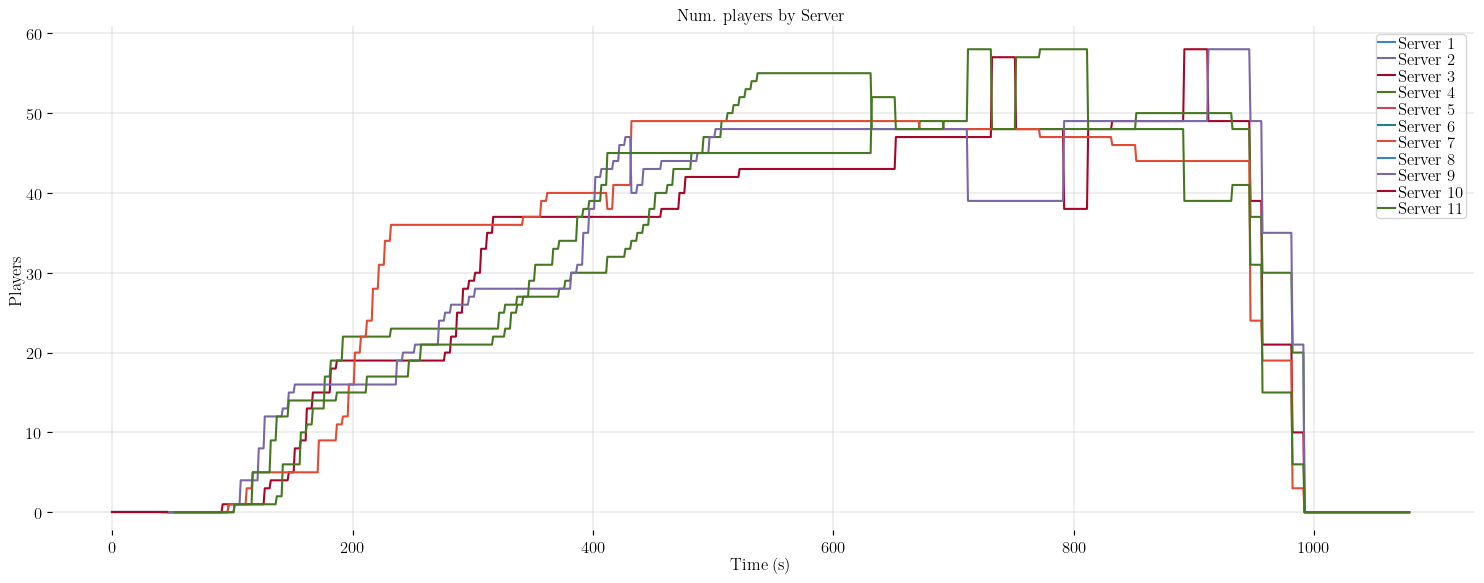

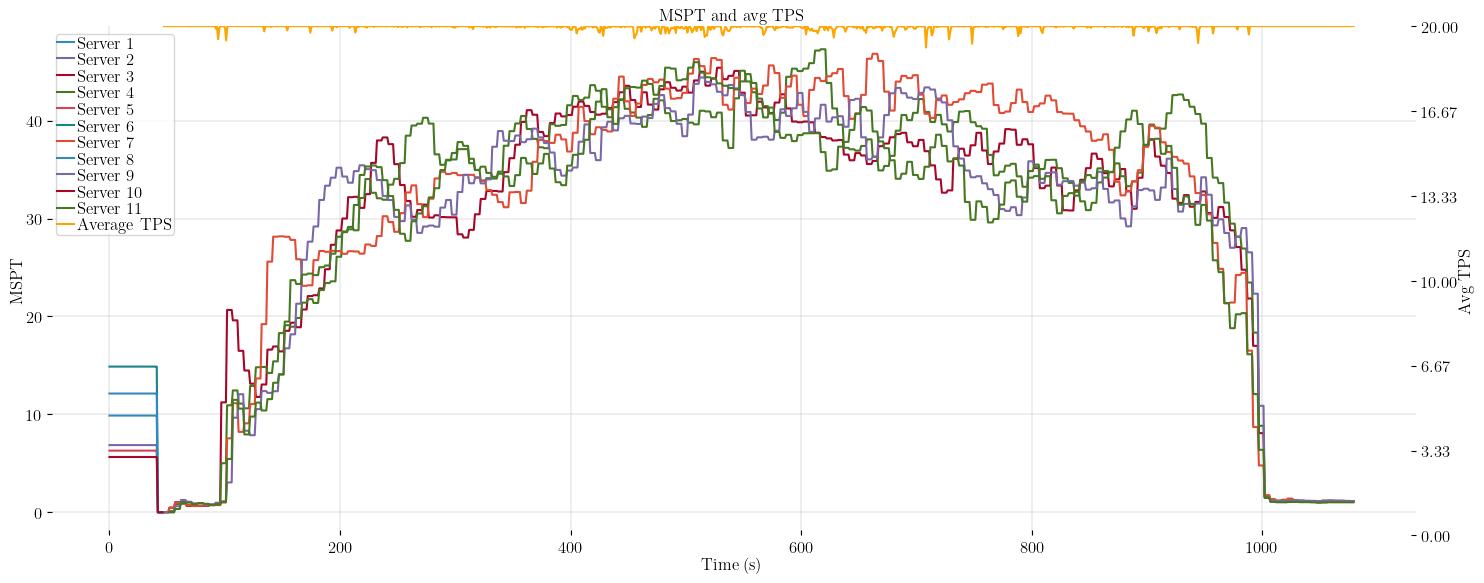

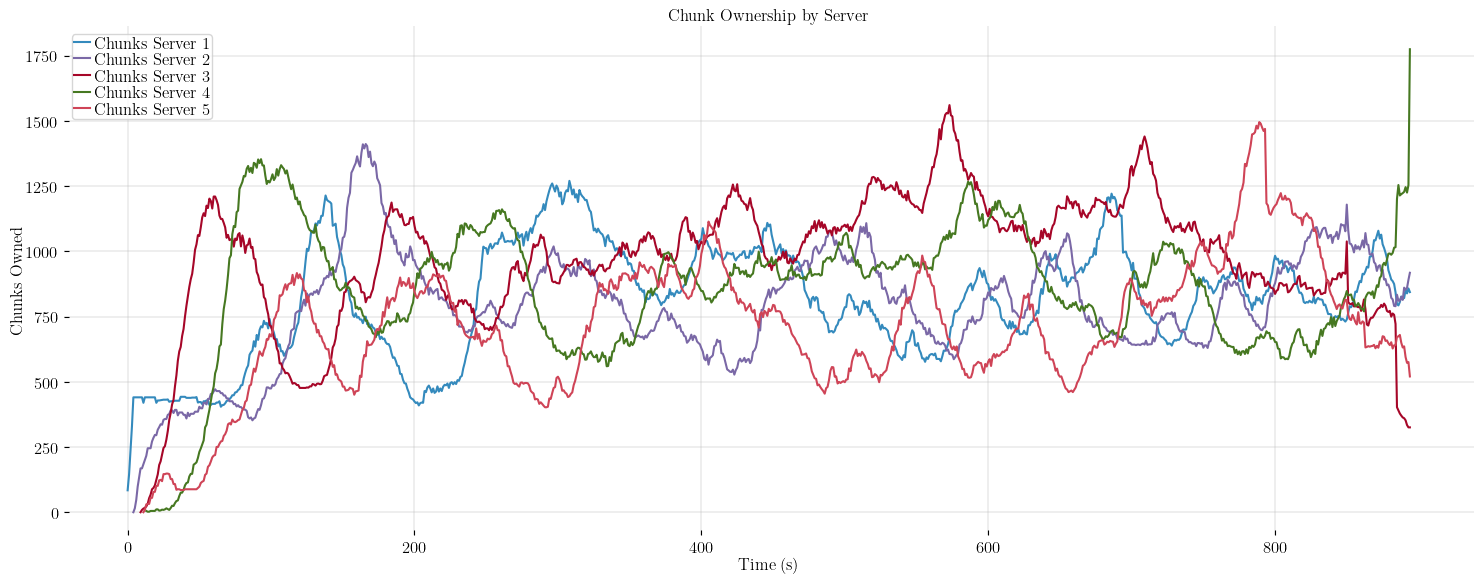

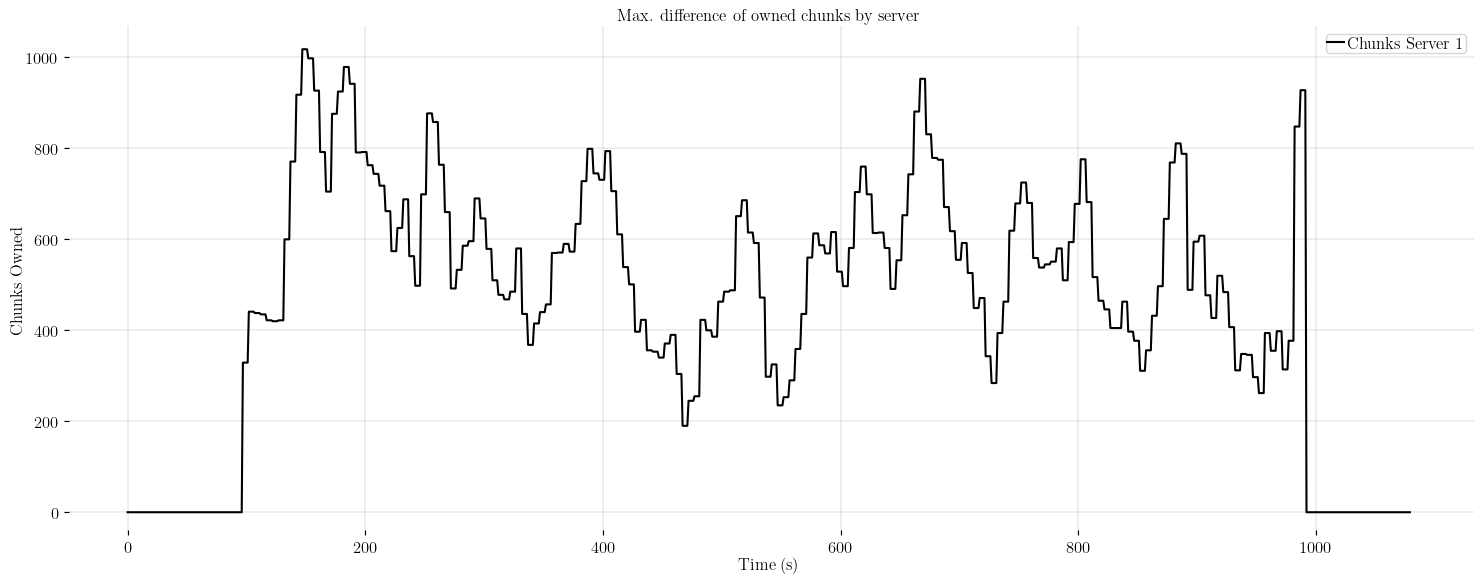

In [7]:
experiment = "test004_5servers_240players_walk"
# tps_players_plot(experiment, selected_metrics, type_exp)
# mspt_plot(experiment, selected_metrics, type_exp)
# mspt_stats_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# player_tps_server_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)
quality_master_plot(experiment, selected_metrics, type_exp)
players_master_plot(experiment, selected_metrics, type_exp)
#mspt_master_plot(experiment, selected_metrics, type_exp)
mspt_tps_master_plot(experiment, selected_metrics, type_exp)
#owned_chunks_master_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
max_diff_chunks_master_plot(experiment, selected_metrics, type_exp)

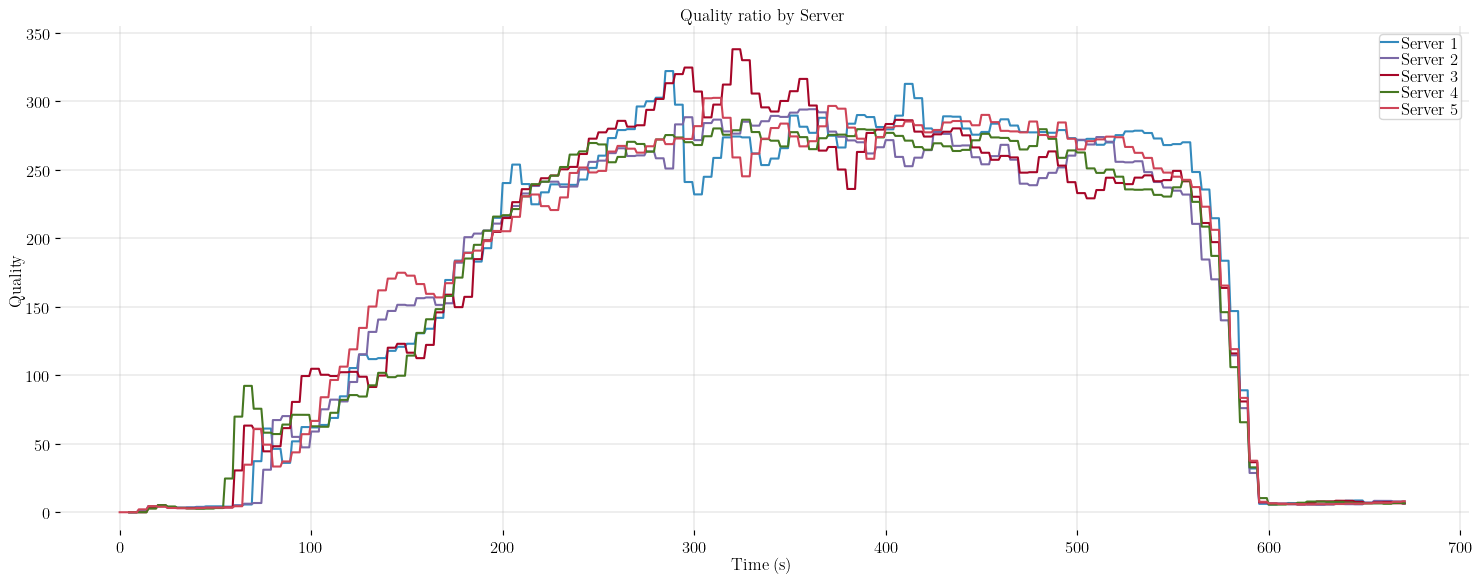

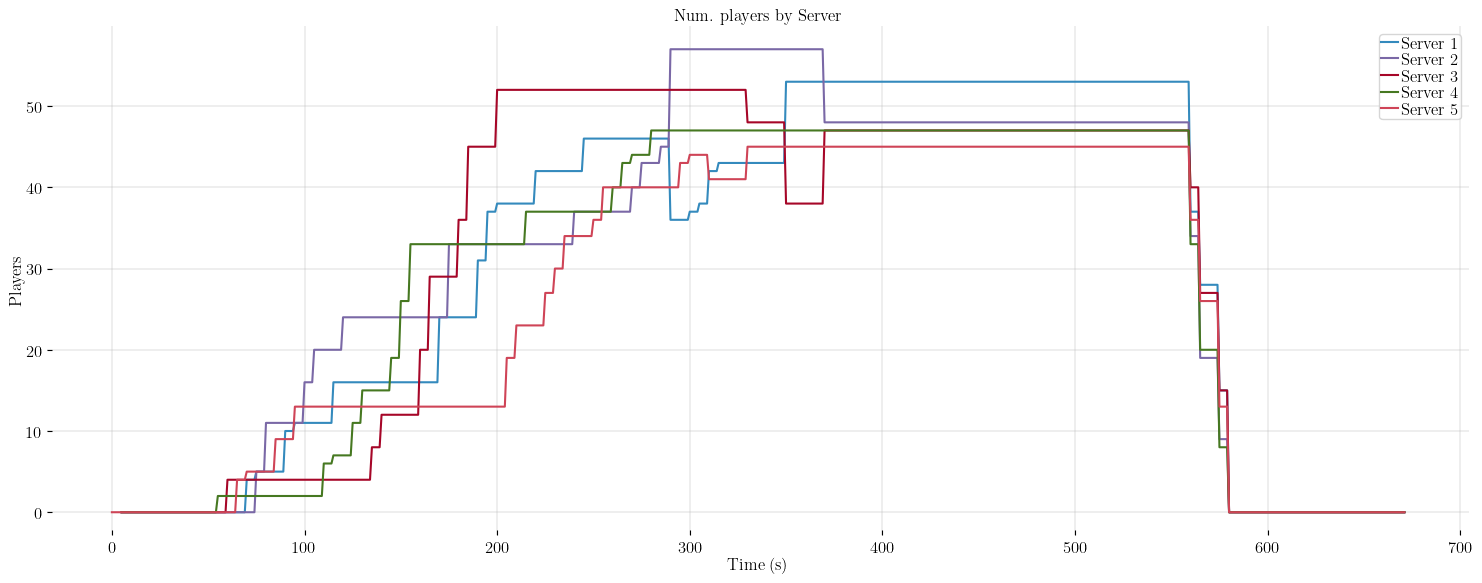

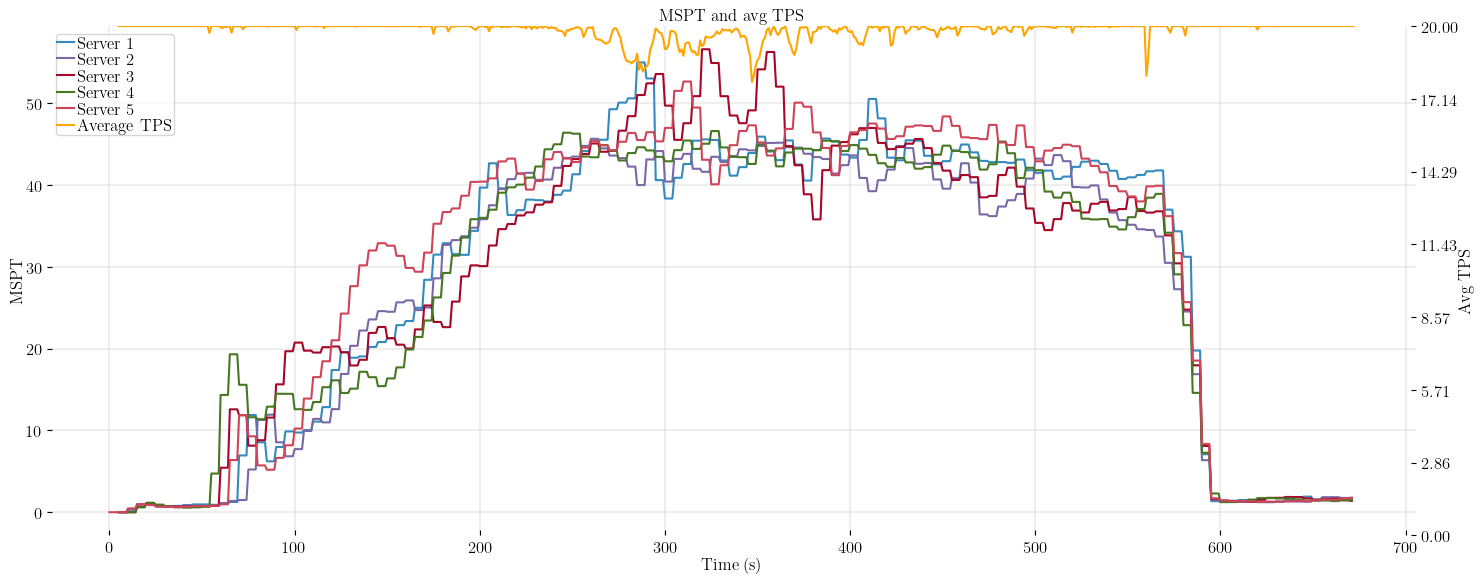

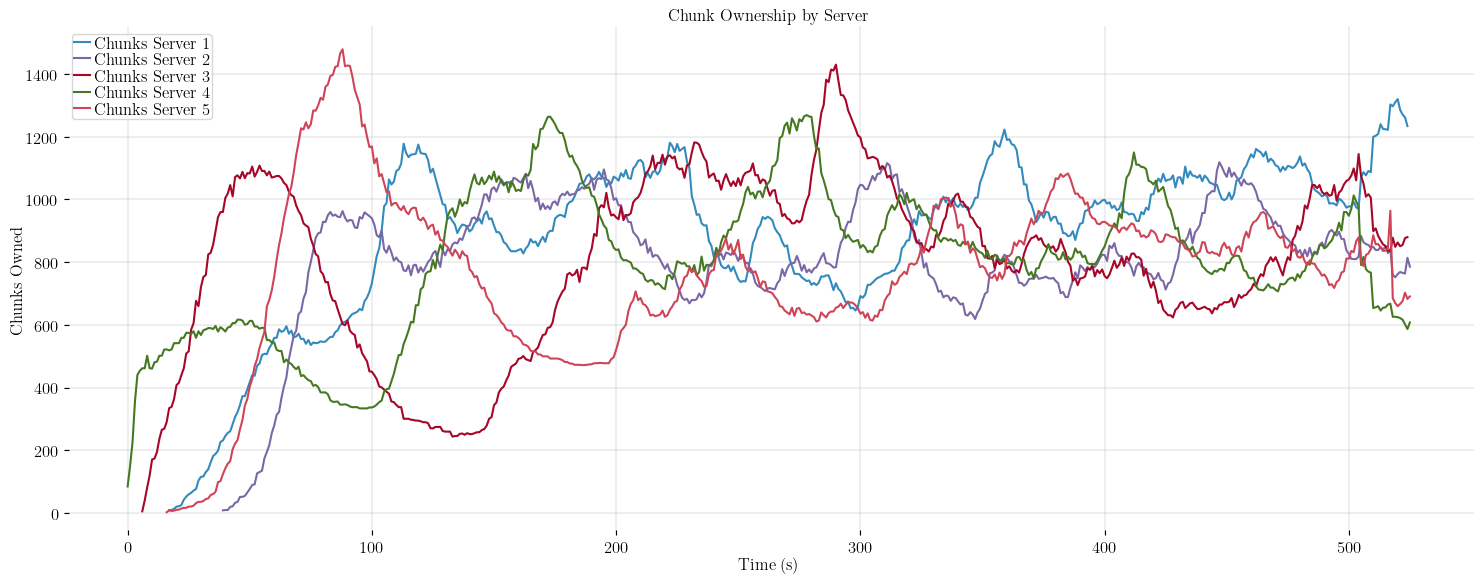

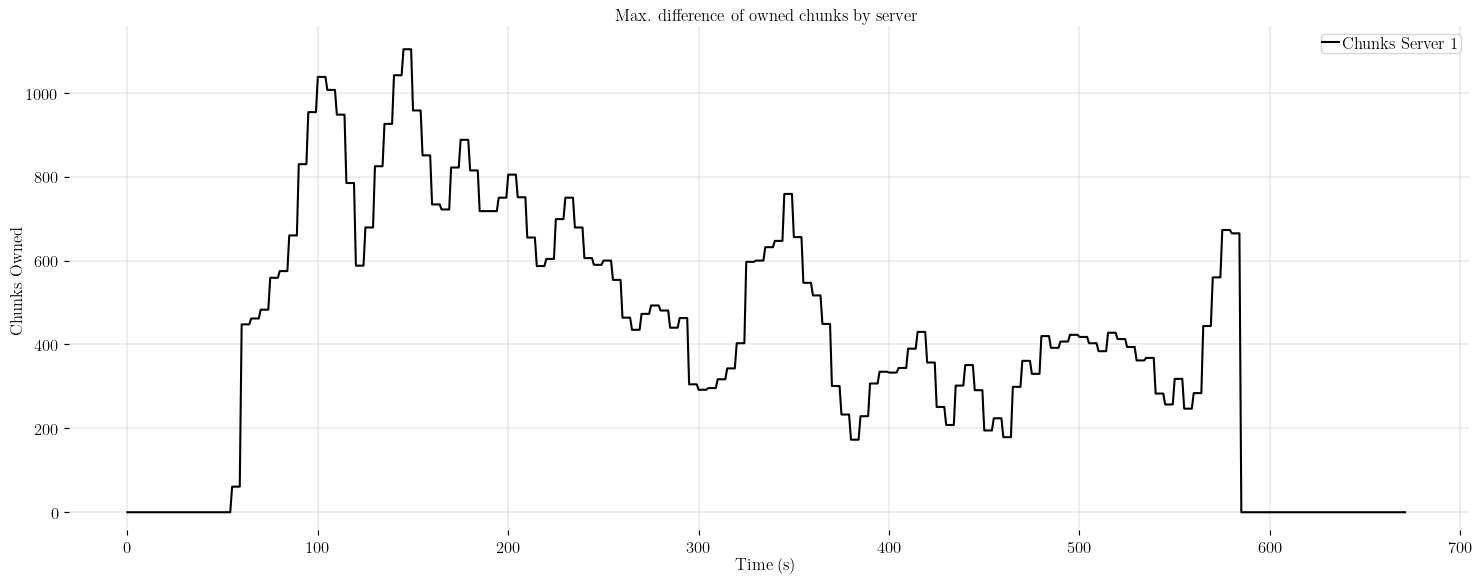

In [15]:
experiment = "test006_5servers_240players_walk_newq"
# tps_players_plot(experiment, selected_metrics, type_exp)
# mspt_plot(experiment, selected_metrics, type_exp)
# mspt_stats_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# player_tps_server_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)
quality_master_plot(experiment, selected_metrics, type_exp)
players_master_plot(experiment, selected_metrics, type_exp)
#mspt_master_plot(experiment, selected_metrics, type_exp)
mspt_tps_master_plot(experiment, selected_metrics, type_exp)
#owned_chunks_master_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
max_diff_chunks_master_plot(experiment, selected_metrics, type_exp)